# Exercise I: Exploratory Data Analysis (EDA)

In our first exercise, we will explore a public dataset of Coronavirus PCR tests based on a fascinating [blog post](https://blog.mafatchallenge.com/2020/04/30/covid-19-testing-with-ml-part-2/) published as part of the [MAFAT Challenge](https://mafatchallenge.mod.gov.il/).

The purpose of this exercise is to demonstrate the importance of inspecting data and understanding it before trying to do anything fancy. As elementary as it may sound, this preliminary step is the pitfall of many data analysis pipelines and nurturing an instinct for visualizing and organizing your raw data will pay off tremendously both in the process of developing and in evaluating the robustness of your models.

We'll start things off by summarizing some key information about the dataset:

* The dataset is shared as [a GitHub repository](https://github.com/mdcollab/covidclinicaldata) containing a directory of CSV files.
* It is collected by two US-based companies providing services in the health industry.
* The number of observations is still relatively small, but more are added weekly and the quality of the data is high (there are many features to work with and it is relatively organized and "clean").
* There are also chest X-rays available for some of the patients, that were not included in this analysis.

So far so good, let's get to work. 

## Data Retrieval

In order to keep things orderly and easy to maintain, we will first create a file with some general configurations:

````{toggle} configuration.py
    :show:
```{literalinclude} configuration.py   
```
````

And then write a short module to create a `read_data()` method:

````{admonition} Technical Note: remove_x_ray_columns
    :class: dropdown, tip
```{literalinclude} read_data.py
    :pyobject: remove_x_ray_columns
```
````

````{toggle}
    :show:
    
```{literalinclude} read_data.py
    :pyobject: read_data
```
````

In [1]:
from read_data import read_data

Now we can read the data by simply running:

In [2]:
data = read_data()

## Raw Inspection

````{admonition} Technical Note: get_scattered_chunks
    :class: dropdown, tip
```{literalinclude} get_scattered_chunks.py
```
````

In [3]:
from get_scattered_chunks import get_scattered_chunks

````{admonition} Technical Note: print_table
    :class: dropdown, tip
We will prepare a function to make the styling of the printed dataframe better suited for our purposes:
```{literalinclude} print_table.py
```
```{tip}
For more information about styling Pandas dataframes, see [the documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).
```
````

In [4]:
from print_table import print_table

In [5]:
data_chunks = get_scattered_chunks(data, n_chunks=5, chunk_size=3)
print_table(data_chunks)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,smoker,temperature,pulse,sys,dia,rr,sats,rapid_flu_results,rapid_strep_results,ctab,labored_respiration,rhonchi,wheezes,days_since_symptom_onset,cough,cough_severity,fever,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,er_referral
0,SARS COV 2 RNA RTPCR,Nasopharyngeal,False,58,True,nan,False,False,False,False,False,False,False,False,36.950000,81.000000,126.000000,82.000000,18.000000,97.000000,nan,nan,False,False,False,False,28.000000,True,Severe,nan,False,nan,False,False,False,False,False,False,False,False,False
1,"SARS-CoV-2, NAA",Oropharyngeal,False,35,False,nan,False,False,False,False,False,False,False,False,36.750000,77.000000,131.000000,86.000000,16.000000,98.000000,nan,nan,False,False,False,False,nan,True,Mild,False,False,nan,False,False,False,False,False,False,False,False,False
2,SARS CoV w/CoV 2 RNA,Oropharyngeal,False,12,nan,nan,False,False,False,False,False,False,False,False,36.950000,74.000000,122.000000,73.000000,17.000000,98.000000,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
2791,Rapid COVID-19 Test,Nasopharyngeal,False,56,False,False,False,True,True,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,False
2792,Rapid COVID-19 Test,Nasal,False,73,False,True,False,False,True,False,False,False,True,False,36.750000,86.000000,124.000000,80.000000,16.000000,98.000000,nan,nan,nan,False,nan,nan,5.000000,True,Mild,False,False,nan,False,False,True,False,False,True,True,False,False
2793,Rapid COVID-19 Test,Nasal,False,25,True,False,False,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,False
5583,"SARS-CoV-2, NAA",Nasal,False,62,True,False,False,False,False,False,False,False,False,False,37.000000,100.000000,110.000000,76.000000,16.000000,98.000000,nan,nan,False,False,False,False,nan,False,nan,nan,False,nan,True,False,True,False,False,True,True,False,False
5584,SARS COV2 NAAT,Nasopharyngeal,False,33,False,nan,False,False,False,False,False,False,False,False,36.950000,79.000000,123.000000,79.000000,12.000000,99.000000,nan,nan,nan,False,nan,nan,nan,False,nan,nan,False,nan,False,False,False,False,False,False,False,False,False
5585,SARS COV2 NAAT,Nasopharyngeal,True,20,True,True,False,False,False,False,False,False,False,False,36.900000,60.000000,114.000000,75.000000,12.000000,97.000000,nan,nan,False,nan,nan,nan,3.000000,True,Mild,True,False,nan,True,False,True,True,True,False,False,False,False
8374,SARS COV2 NAAT,Nasopharyngeal,False,28,False,False,False,False,False,False,True,False,False,False,36.750000,100.000000,119.000000,85.000000,16.000000,99.000000,nan,nan,False,False,False,False,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,False


In [6]:
from configuration import TARGET_COLUMN_NAME
from myst_nb import glue

target = data[TARGET_COLUMN_NAME]
n_positives = target.sum()

glue("n_observations", len(data), display=False)
glue("n_columns", len(data.columns), display=False)
glue("target_column_name", TARGET_COLUMN_NAME, display=False)
glue("n_positives", n_positives, display=False)

Alright! Some things that we can already learn about our dataset from this table are:
* It contains a total of {glue:}`n_observations` observations.
* There are {glue:}`n_columns` columns with mixed data types (nemeric and categorical).
* Missing values certainly exist (we can easily spot `nan` entries).
* The subsample raises a strong suspicion that dataset is imbalanced, i.e. when examining our target variable ({glue:}`target_column_name`) it seems there are far more negative observations than positive ones. A quick `sum()` call reveals that indeed only {glue:}`n_positives` of the {glue:}`n_observations` observations are positive.

There are at least two more built-in methods we could use to get a better sense of the information contained within each column are. The first is:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11169 entries, 0 to 11168
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   test_name                      11169 non-null  object 
 1   swab_type                      11169 non-null  object 
 2   covid19_test_results           11169 non-null  bool   
 3   age                            11169 non-null  int64  
 4   high_risk_exposure_occupation  11000 non-null  object 
 5   high_risk_interactions         9668 non-null   object 
 6   diabetes                       11169 non-null  bool   
 7   chd                            11169 non-null  bool   
 8   htn                            11169 non-null  bool   
 9   cancer                         11169 non-null  bool   
 10  asthma                         11169 non-null  bool   
 11  copd                           11169 non-null  bool   
 12  autoimmune_dis                 11169 non-null 

In [8]:
n_categorial = len(data.select_dtypes(["object", "bool"]).columns) - 1
n_features = len(data.columns) - 1
glue("n_categorical", n_categorial, display=False)
glue("n_features", n_features, display=False)

This simple table allows us to easily infer that:
* Most ({glue:}`n_categorical`/{glue:}`n_features`) of the collected features are categorial (their data type is `object` or `bool`).
* Some features contain relatively few non-null values.

Another useful method we can use is:

In [9]:
data.describe()

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,11169.000000,6542.000000,6525.000000,6551.000000,6551.000000,5762.000000,6386.000000,3573.000000
mean,42.178172,36.875268,78.730115,126.043505,79.706457,15.049462,98.108988,10.142177
std,16.107779,0.316541,13.823534,16.789703,9.865094,2.092585,1.446847,19.023191
min,-3.000000,34.950000,40.000000,75.000000,36.000000,10.000000,76.000000,1.000000
25%,30.000000,36.700000,69.000000,115.000000,74.000000,14.000000,97.000000,2.000000
50%,40.000000,36.850000,78.000000,124.000000,80.000000,16.000000,98.000000,4.000000
75%,54.000000,37.000000,87.000000,135.000000,85.000000,16.000000,99.000000,10.000000
max,90.000000,39.400000,150.000000,235.000000,135.000000,32.000000,100.000000,300.000000


In [10]:
from print_table import get_table_styles

table_styles = get_table_styles()
data.describe().style.set_table_styles(table_styles).set_properties(
    **{"text-align": 'center'})

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,11169.000000,6542.000000,6525.000000,6551.000000,6551.000000,5762.000000,6386.000000,3573.000000
mean,42.178172,36.875268,78.730115,126.043505,79.706457,15.049462,98.108988,10.142177
std,16.107779,0.316541,13.823534,16.789703,9.865094,2.092585,1.446847,19.023191
min,-3.000000,34.950000,40.000000,75.000000,36.000000,10.000000,76.000000,1.000000
25%,30.000000,36.700000,69.000000,115.000000,74.000000,14.000000,97.000000,2.000000
50%,40.000000,36.850000,78.000000,124.000000,80.000000,16.000000,98.000000,4.000000
75%,54.000000,37.000000,87.000000,135.000000,85.000000,16.000000,99.000000,10.000000
max,90.000000,39.400000,150.000000,235.000000,135.000000,32.000000,100.000000,300.000000


This table summarizes the basic properties of each of the numerical columns contained in the dataset and gives a brief overview of the observed variance.

## Missing Values

Handling missing values requires careful judgement. Possible solutions include:
* Removing the entire feature (column) containing the missing values.
* Removing all observations with missing values.
* *Imputation*: "Filling in" missing values with some constant or statistic, such as the mean or the mode. 

There is not one correct method - different circumstances call for different approaches, and often there is still room for debate. However, some useful guidelines are: 
* If a column contains a small number of observations (relative to the size of the dataset) and the dataset is rich enough and offers more features that could be expected to be informative, it might be best to remove it.
* If the dataset is large and the feature in question is crucial for the purposes of our analysis, remove all observations with missing values. 
* Imputation might sound like a good trade-off if there is a good reason to believe some statistic may adequately approximate the missing values, but it is also the subject of many misconceptions and often used poorly.
* There are also learning methods that can safely include missing values (such as decision trees). We will learn when and how these are used later in this course.

Let's first get a better sense of what fraction of the values is missing in each of the relevant columns in our dataset:

````{admonition} Technical Note: calculate_nan_fractions
    :class: dropdown, tip
```{literalinclude} missing_values.py
    :pyobject: calculate_nan_fractions
```
````

In [11]:
from missing_values import calculate_nan_fractions

In [12]:
missing_fractions_df = calculate_nan_fractions(data)
missing_fractions_df.style.format("{:,.2%}")

,Total Missing,Negatives Fraction,Positives Fraction
Column Name,,,
rapid_strep_results,99.23%,97.20%,2.80%
rapid_flu_results,98.52%,97.26%,2.74%
sob_severity,91.50%,97.24%,2.76%
cough_severity,85.12%,97.69%,2.31%
days_since_symptom_onset,68.01%,97.72%,2.28%
rhonchi,59.61%,97.93%,2.07%
wheezes,56.80%,98.03%,1.97%
rr,48.41%,98.02%,1.98%
ctab,47.39%,98.34%,1.66%


In [13]:
positives_fraction = "{:,.2%}".format(len(data[target]) / len(data))
mean_positives_null_fraction = "{:,.2%}".format(missing_fractions_df["Positives Fraction"].mean())

glue("mean_positives_null_fraction", mean_positives_null_fraction, display=False)
glue("positives_fraction", positives_fraction, display=False)

This table allows us to see which columns containt a large fraction of missing values, and also shows us that the mean relative fraction of missing values in Coronavirus-positive observations ({glue:}`mean_positives_null_fraction`) isn't far from the general fraction of positives ({glue:}`positives_fraction`). This is a good sign, and while not really proving anything, gives us good reason to believe the the dataset does not include a ["missing not at random"](https://en.wikipedia.org/wiki/Missing_data#Missing_not_at_random) bias.

In [14]:
from configuration import NAN_FRACTION_THRESHOLD

glue("nan_fraction_threshold", "{:,.2%}".format(NAN_FRACTION_THRESHOLD), display=False)

Now, we will create a simple function to remove all columns with more than {glue:}`nan_fraction_threshold` of missing values as well as any remaining observations which include missing values:

````{admonition} Technical Note: remove_missing_data_columns
    :class: dropdown, tip
```{literalinclude} missing_values.py
    :pyobject: remove_missing_data_columns
```
````

````{toggle}
    :show:
```{literalinclude} missing_values.py
    :pyobject: clean_missing_values
```
````

And run it:

In [15]:
from missing_values import clean_missing_values

In [16]:
data = clean_missing_values(data)

Our dataset is now clean from any missing values and ready for further inspection.

In [17]:
X = data.drop(TARGET_COLUMN_NAME, axis=1)

categorial_features = X.select_dtypes(["object", "bool"])
numerical_featuers = X.select_dtypes(exclude=["object", "bool"])

print("Categorial features:\n" + ", ".join(categorial_features.columns))
print("\nNumerical features:\n" + ", ".join(numerical_featuers.columns))

Categorial features:
test_name, swab_type, high_risk_exposure_occupation, high_risk_interactions, diabetes, chd, htn, cancer, asthma, copd, autoimmune_dis, smoker, ctab, labored_respiration, cough, fever, sob, diarrhea, fatigue, headache, loss_of_smell, loss_of_taste, runny_nose, muscle_sore, sore_throat, er_referral

Numerical features:
age, temperature, pulse, sys, dia, rr, sats


In [18]:
n_features_after = len(data.columns) - 1
n_observations_after = len(data)
target = data[TARGET_COLUMN_NAME]
n_positives_after = target.sum()

glue("n_features_after", n_features_after, display=False)
glue("n_observations_after", n_observations_after, display=False)
glue("n_positives_after", n_positives_after, display=False)

We are left with {glue:}`n_features` features and {glue:}`n_observations_after` observations ({glue:}`n_positives_after` of which are positive).

### Feature Correlations

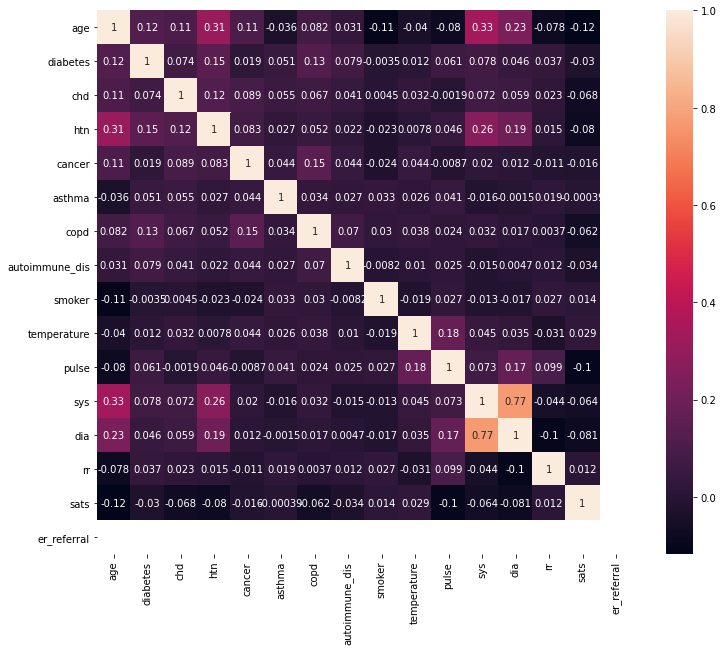

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr()
fig, ax = plt.subplots(figsize=(12, 10))
_ = sns.heatmap(correlation_matrix, annot=True)

Note that `er_referral` appears as a blank row, indicating a the correlation function returned NaN. Can you guess why?

```{admonition} Solution
    :class: hint, dropdown
`er_referral` contains only *False* values. Without variance correlation is meaningless.
```

In [20]:
X.drop("er_referral", axis=1, inplace=True)

## Categorial Features

Boolean columns previously containing missing values might have been originally inferred as `object` type columns, we'll use pandas' `convert_dtypes()` method to infer data types again:

In [21]:
X = X.convert_dtypes()

Assuming $y$ (a COVID-19 positive patient), what is the probability of each of the features (symptomps):

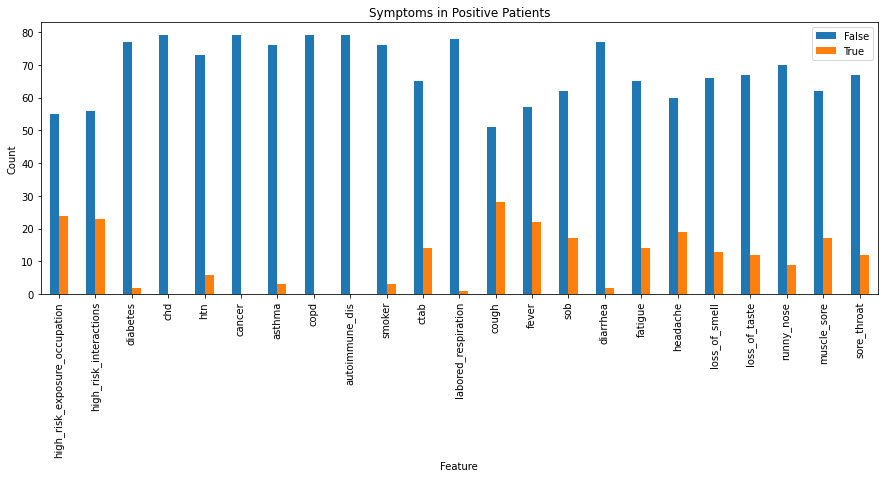

In [22]:
import pandas as pd

boolean_features = X.select_dtypes(["bool"])
positives = boolean_features[target]
value_counts = {}
for column in positives:
    value_counts[column] = positives[column].value_counts()
value_counts = pd.DataFrame(value_counts)

fig, ax = plt.subplots(figsize=(15, 5))
_ = value_counts.T.plot(kind="bar", ax=ax)
_ = plt.title("Symptoms in Positive Patients")
_ = ax.set_xlabel("Feature")
_ = ax.set_ylabel("Count")

To plot the fraction of `True` observations in each of our target groups:

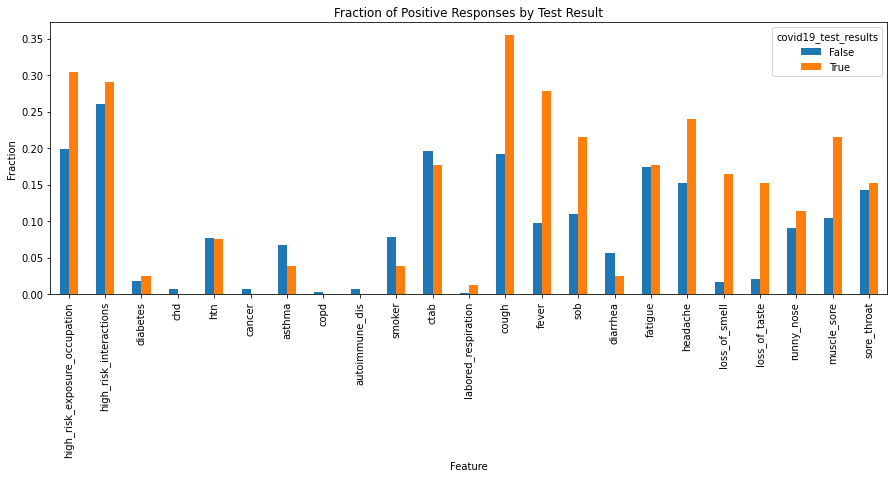

In [23]:
# Group all boolean features by the target variable (COVID-19 test result)
grouped = boolean_features.groupby(target)

# Calculate the fraction of positives in each group.
fractions = grouped.sum() / grouped.count()

# Create a bar plot.
fig, ax = plt.subplots(figsize=(15, 5))
_ = fractions.T.plot(kind="bar", ax=ax)
_ = plt.title("Fraction of Positive Responses by Test Result")
_ = ax.set_xlabel("Feature")
_ = ax.set_ylabel("Fraction")

## Numerical Features

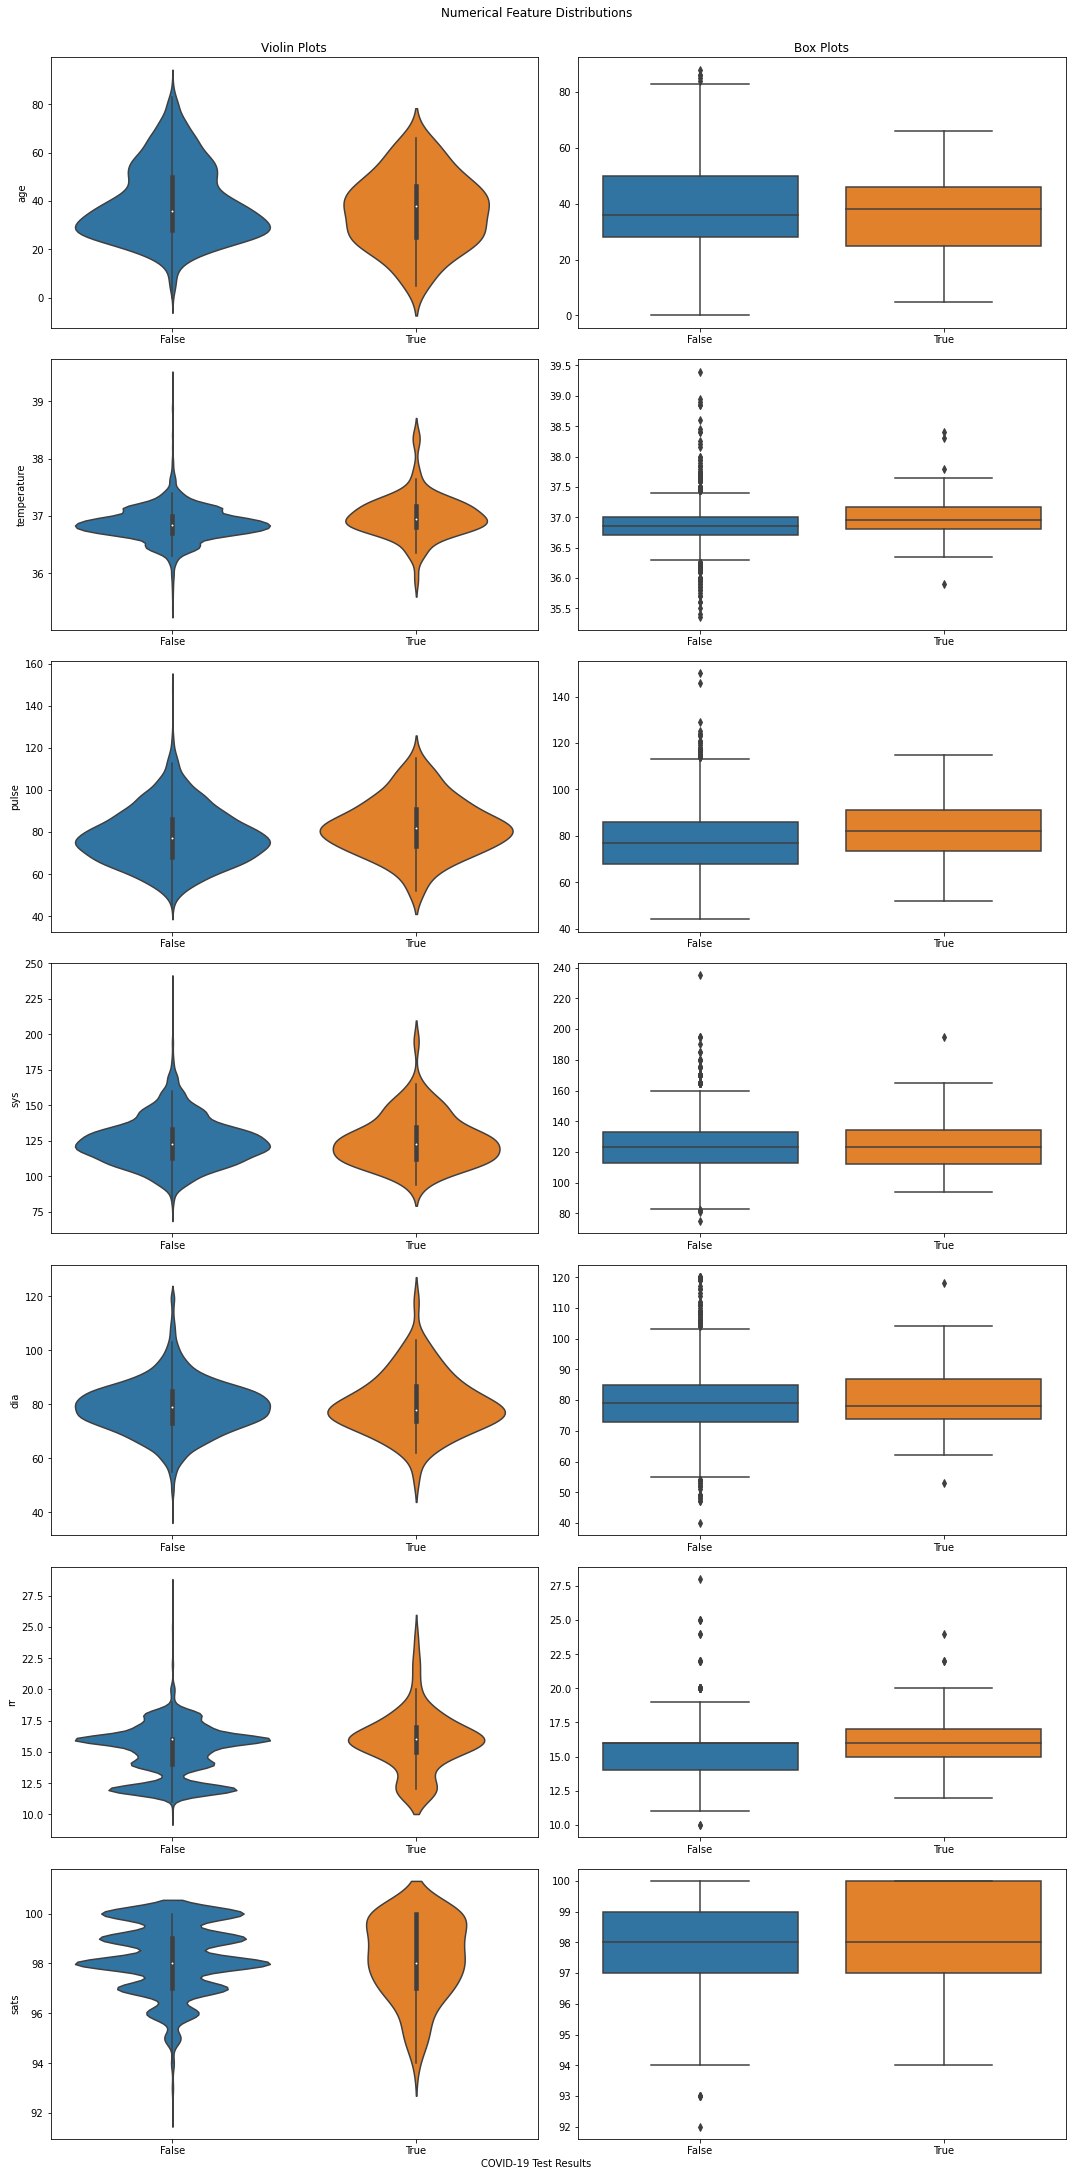

In [24]:
# Select all numerical features.
numerical_features = X.select_dtypes(["float64", "int64"])

# Create distribution plots.
nrows = len(numerical_features.columns)
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 30))
for i, feature in enumerate(numerical_features):
    sns.violinplot(x=TARGET_COLUMN_NAME, y=feature, data=data, ax=ax[i, 0])
    if i == 0:
        ax[i, 0].set_title("Violin Plots")
        ax[i, 1].set_title("Box Plots")        
    sns.boxplot(x=TARGET_COLUMN_NAME, y=feature, data=data, ax=ax[i, 1])
    ax[i, 0].set_xlabel("")
    ax[i, 1].set_xlabel("")
    ax[i, 1].set_ylabel("")
_ = fig.text(0.5, 0, "COVID-19 Test Results", ha='center')
_ = fig.suptitle("Numerical Feature Distributions", y=1)
fig.tight_layout()

```{note}
[Violin plots](https://en.wikipedia.org/wiki/Violin_plot) are essentially [box plots](https://en.wikipedia.org/wiki/Box_plot) combined with a [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation). While box plots give us a good understanding of the data's quartiles and outliers, violin plots provide us with an informative representation of it's entire distribution.
```